<a href="https://colab.research.google.com/github/JoFchtr/DSF-FS22-Johanna-Feuchter/blob/main/Copy_of_CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points] 
- Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
- Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
- Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
- Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
path ="/content/drive/MyDrive/DSF/4ms_10 av_30 s_Absorbance_10-32-04-868 (1).txt"

Mounted at /content/drive


Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile.

In [ ]:
import pandas as pd


no_data = 13 ##header

def open_the_file(path):
    header = str(pd.read_csv(path, delimiter ="\t", nrows = no_data-1))
    
    open("header.txt","w").write(header)        ###saves header to new file
    
    return open("header.txt", "r").readlines()      ###reads header from the new file
       
open_the_file(path)

print(open_the_file(path))

['   Data from 4ms_10 av_15 s_Absorbance_10-32-04-868.txt Node\n', '0                 Date: Thu Oct 25 10:32:04 CEST 2018       \n', '1                                     User: Christoph       \n', '2                              Spectrometer: BALLMOOS       \n', '3                                     Trigger mode: 4       \n', '4                 Integration Time (sec): 4.000000E-3       \n', '5                                Scans to average: 10       \n', '6              Electric dark correction enabled: true       \n', '7              Nonlinearity correction enabled: false       \n', '8                                     Boxcar width: 0       \n', '9                             XAxis mode: Wavelengths       \n', '10                 Number of Pixels in Spectrum: 3648       \n', '11                      >>>>>Begin Spectral Data<<<<<       ']


In [ ]:
df = pd.read_csv(path, delimiter="\t", header =13)  #imports the data from the txt file
df.to_csv("stripped_data.csv") #saves df as csv file


Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches.

In [ ]:
import time as t
import numpy as np

tic = t.perf_counter()  ##this mesures starting time

###agerage over 1 nm

def round_down(x):          ##funktion to round the number down, to be sure to have 136 for 136.9999 and not 137
  x= int(x)
  return x


#J=1    #to find the number of rows --> not sure if this works
#while df.iloc[J:1] != 0:
  # J+=1
    
J=352 #I know that we 356 rows --> dummy

i=3 # columns df
ii = 1 #columns of average DF
j=2 # rows
z=1 # counts the same wavelength 


df_avr = pd.DataFrame()        # empty data frame, df_avr.columns should be the wavelenght (316,317,...), underneith the averages

while i < len(df.columns) -2:   #outer loop, goes though all columns 
    while round_down(float(df.columns[i])) == round_down(float(df.columns[i+1])): # looks for wavelenght with same integer
        i+=1    #go on and try next
        z+=1    #found one again

        for j in range(J):    # here I start averaging all Elements for the rows with same int(wavelenght), I write it into df-avr
            df_avr.loc[j,ii].values += df.loc[j,i].values # sum it up first
         
    df_avr.loc[j,ii].values += df.loc[j,i+1].values     #let's not forget the last one ((2,2,2,3)--> 6, not 4)    
    for j in range(2,J):                        #count everything and devide by the number of elements --> here we to the proper average
        df_avr.loc[j,ii].values/=z
       
    z=1             # to start again at 1 when moving on to new int(wavelenght)
    ii+=1 #start new average for new wavelenght only when the previous one is finished
        
    i+=1  #so outer loop can try out next group of wavelenght (2,2,2,2,3)
          #                                                    0,1,2,3,4   i changes to 4            
    
tic = t.perf_counter()  #this mesures endtime

print(f"this whole thing took {toc - tic:0.4f} seconds")

print(df_avr)




"""
ok and this does not work... I tried for several hours, but I could'nt get it right. the loops seem to be correct though, I tested them individually and everything 
was fine, but it seems like I cannot access the values of the csv file ( the df.iloc[]), which is weird as I can do it for the plot.
I get an error message starting at the inner for loop. The loop works, but df_avr.loc[j,ii] += df.loc[j,i] does not, and I don't know how I could do it any different.
I have never worked with pandas before, or with data frames in general, so I guess I'm missing out on this point.
"""


KeyError: ignored

In [ ]:
% ls -l 

total 8
drwx------ 5 root root 4096 Mar 16 15:28 drive/
drwxr-xr-x 1 root root 4096 Mar  9 14:48 sample_data/


Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time.
Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file

please give me a first column number 54
please give me the number of th column you would like to substract 76


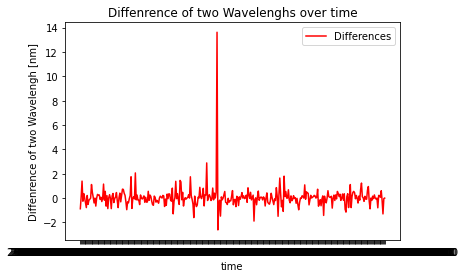

In [ ]:
import matplotlib.pyplot as plt


z1 =int(input("please give me a first column number "))          #asks for to input, you just gotta know your column numbers
z2 = int(input("please give me the number of th column you would like to substract "))

x = df.iloc[:,0]   #time is not in seconds, same problem as above... calculating with the entries of the data frame is not possible as is seems
y = df.iloc[:,z2]-df.iloc[:,z1]                          #difference between the two wavelengh, here I can sum up the entries for some reason

plt.plot(x,y, "r", label = "Differences")  #the "r" changes the colour of the plot for blue to red


plt.title("Diffenrence of two Wavelenghs over time")
plt.xlabel("time")      
plt.ylabel("Diffenrence of two Wavelengh [nm]")
plt.legend()
plt.savefig("TheSave.png")
plt.show()


Plot the full and the reduced datasets in the same figure. Is there any visual difference? 

In [ ]:
""" I would if I could, but as I do not have any reduced data sets, I will write it how I would do it if I had figured out how to reduce it

the reduced data frames would be : 

df_reduced_1nm
df_reduced_2nm
df_reduced_3nm
df_reduced_4nm
"""

x = df.iloc[:,0]
y_1 = df_reduced_1nm
y_2 = df_reduced_2nm
y_3 = df_reduced_3nm
y_4 = df_reduced_4nm

plt.plot(x,y_1, label ="reduced over 1nm")           
plt.plot(x,y_2, label ="reduced over 2nm")
plt.plot(x,y_3, label ="reduced over 3nm")
plt.plot(x,y_4, label ="reduced over 3nm")
plt.plot(x,y, label ="not reduced")

plt.title("All the Data Frames")
plt.xlabel("t")
plt.ylabel("wavelenght [nm]")
plt.legend()
plt.show()

"""
there would for sure be visible differences if you use plt.scatter() instead of plt.plot(), as the first one shows dots and the second one shows lines (less dots for the 
scatter), and the colours are different (automatically) for the different data sets
""" 